# Summative Assessment 2 in Python

In [2]:
#This code block was designated to import some neccessary modules

import pandas as pd
import numpy as np
import chardet
import matplotlib.pyplot as plt

### Context
Forest fires are a serious problem for the preservation of the Tropical Forests. Understanding the frequency of forest fires in a time series can help to take action to prevent them.

Brazil has the largest rainforest on the planet that is the Amazon rainforest.

### Content
This dataset reports the number of forest fires in Brazil divided by states. The series comprises the period of approximately 10 years (1998 to 2017). The data were obtained from the official website of the Brazilian government.

In [3]:
with open("amazon.csv", "rb") as f:
    #Through chardet, we can automatically detects the specific "encoding" needed to decode and export dataset
    result = chardet.detect(f.read()) 

pd.read_csv("amazon.csv", encoding=result["encoding"])

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,01/01/1998
1,1999,Acre,Janeiro,0.0,01/01/1999
2,2000,Acre,Janeiro,0.0,01/01/2000
3,2001,Acre,Janeiro,0.0,01/01/2001
4,2002,Acre,Janeiro,0.0,01/01/2002
...,...,...,...,...,...
6449,2012,Tocantins,Dezembro,128.0,01/01/2012
6450,2013,Tocantins,Dezembro,85.0,01/01/2013
6451,2014,Tocantins,Dezembro,223.0,01/01/2014
6452,2015,Tocantins,Dezembro,373.0,01/01/2015


### (1) Display the first 10 rows of the DataFrame

In [3]:
df = pd.read_csv("amazon.csv", encoding=result["encoding"])
df.head(10)

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01
5,2003,Acre,Janeiro,10.0,2003-01-01
6,2004,Acre,Janeiro,0.0,2004-01-01
7,2005,Acre,Janeiro,12.0,2005-01-01
8,2006,Acre,Janeiro,4.0,2006-01-01
9,2007,Acre,Janeiro,0.0,2007-01-01


### (2) display the last 10 rows of the DataFrame

In [4]:
df.tail(10)

,year,state,month,number,date
6444,2007,Tocantins,Dezembro,13.0,2007-01-01
6445,2008,Tocantins,Dezembro,7.0,2008-01-01
6446,2009,Tocantins,Dezembro,46.0,2009-01-01
6447,2010,Tocantins,Dezembro,72.0,2010-01-01
6448,2011,Tocantins,Dezembro,105.0,2011-01-01
6449,2012,Tocantins,Dezembro,128.0,2012-01-01
6450,2013,Tocantins,Dezembro,85.0,2013-01-01
6451,2014,Tocantins,Dezembro,223.0,2014-01-01
6452,2015,Tocantins,Dezembro,373.0,2015-01-01
6453,2016,Tocantins,Dezembro,119.0,2016-01-01


### (3) Display the shape of the DataFrame

In [73]:
print("Through shape attribute, we determined that the number of rows and columns are:", df.shape)

Through shape attribute, we determined that the number of rows and columns are: (6454, 5)


### (4) Get information about the dataset

In [5]:
#Through info attribute, we distinguish the needed data descriptions such as datatypes of each column and memory requirement.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6454 entries, 0 to 6453
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    6454 non-null   int64  
 1   state   6454 non-null   object 
 2   month   6454 non-null   object 
 3   number  6454 non-null   float64
 4   date    6454 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 252.2+ KB


### (5) Check for duplicate data, and drop/highlight them

In [6]:
#Two things, we will check for duplicate rows through duplicated() method and assign these rows on a new dataFrame
    #And then, through the shape attribute, we will know how many rows are there.
# check for duplicate rows
duplicate_rows = df.duplicated()
print(df[duplicate_rows])

print(df[duplicate_rows].shape, "\nThere are 32 rows which are duplicated")

      year        state      month  number        date
259   2017      Alagoas    Janeiro    38.0  2017-01-01
2630  1998  Mato Grosso    Janeiro     0.0  1998-01-01
2650  1998  Mato Grosso  Fevereiro     0.0  1998-01-01
2670  1998  Mato Grosso      Março     0.0  1998-01-01
2690  1998  Mato Grosso      Abril     0.0  1998-01-01
2710  1998  Mato Grosso       Maio     0.0  1998-01-01
3586  1998      Paraiba    Janeiro     0.0  1998-01-01
3606  1998      Paraiba  Fevereiro     0.0  1998-01-01
3621  2013      Paraiba  Fevereiro     9.0  2013-01-01
3626  1998      Paraiba      Março     0.0  1998-01-01
3646  1998      Paraiba      Abril     0.0  1998-01-01
3666  1998      Paraiba       Maio     0.0  1998-01-01
4542  1998          Rio    Janeiro     0.0  1998-01-01
4562  1998          Rio  Fevereiro     0.0  1998-01-01
4582  1998          Rio      Março     0.0  1998-01-01
4585  2001          Rio      Março     0.0  2001-01-01
4590  2006          Rio      Março     8.0  2006-01-01
4602  1998

### (6) Check whether there are some null values in the dataset

In [7]:
#We will count if there is any information that is a null value, and then highlight these data

null_counts = df.isnull().sum()
print(null_counts)

null_values = df.isnull().any()
print(null_values[null_values == True])

year      0
state     0
month     0
number    0
date      0
dtype: int64
Series([], dtype: bool)


### (7) Get overall statistics about the DataFrame

In [8]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
year,6454.0,NaN,NaN,NaN,2007.461729,5.746654,1998.0,2002.0,2007.0,2012.0,2017.0
state,6454,23,Rio,717,NaN,NaN,NaN,NaN,NaN,NaN,NaN
month,6454,12,Janeiro,541,NaN,NaN,NaN,NaN,NaN,NaN,NaN
number,6454.0,NaN,NaN,NaN,108.293163,190.812242,0.0,3.0,24.0,113.0,998.0
date,6454,20,1998-01-01,324,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### (8) Rename month names into English

In [9]:
#By creating a dictionary, we assigned values on the each Portuguese months into its English counterparts
month_BRA_to_ENG = {
    "Janeiro": "January",
    "Fevereiro": "February",
    "Março": "March",
    "Abril": "April",
    "Maio": "May",
    "Junho": "June",
    "Julho": "July",
    "Agosto": "August",
    "Setembro": "September",
    "Outubro": "October",
    "Novembro": "November",
    "Dezembro": "December"
}
df["month"] = df["month"].replace(month_BRA_to_ENG)
df

,year,state,month,number,date
0,1998,Acre,January,0.0,1998-01-01
1,1999,Acre,January,0.0,1999-01-01
2,2000,Acre,January,0.0,2000-01-01
3,2001,Acre,January,0.0,2001-01-01
4,2002,Acre,January,0.0,2002-01-01
...,...,...,...,...,...
6449,2012,Tocantins,December,128.0,2012-01-01
6450,2013,Tocantins,December,85.0,2013-01-01
6451,2014,Tocantins,December,223.0,2014-01-01
6452,2015,Tocantins,December,373.0,2015-01-01


### (9) Get the total number of fires registered

In [10]:
overall_sum = df['number'].sum()
print("Overall sum of fire incidents:", overall_sum)

Overall sum of fire incidents: 698924.073


### (10) In which month maximum number of forest fires were reported?

Text(0, 0.5, 'Number of Fire Incidents Registered')

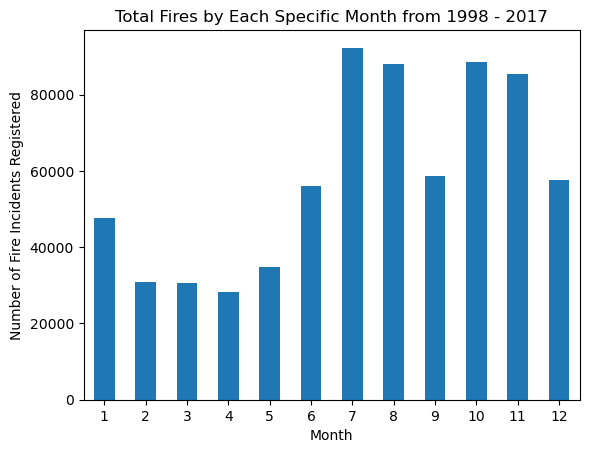

In [12]:
# Create a dictionary to map month names to their corresponding numbers
month_dict = {
    'January': 1, 
    'February': 2, 
    'March': 3, 
    'April': 4, 
    'May': 5, 
    'June': 6,    
    'July': 7, 
    'August': 8,
    'September': 9, 
    'October': 10, 
    'November': 11, 
    'December': 12
}
df['Month_Number'] = df['month'].map(month_dict)
fire_sum_by_month = df.groupby('Month_Number')['number'].sum()
fire_sum_by_month = fire_sum_by_month.sort_index()

fire_sum_by_month.plot.bar(x='Month', y='Number', rot=0)
plt.title('Total Fires by Each Specific Month from 1998 - 2017')
plt.xlabel('Month')
plt.ylabel('Number of Fire Incidents Registered')

#### This data significantly concludes that in the month of July, the maximum number of forest fires were reported

### (11) In which year maximum number of forest fires was reported?

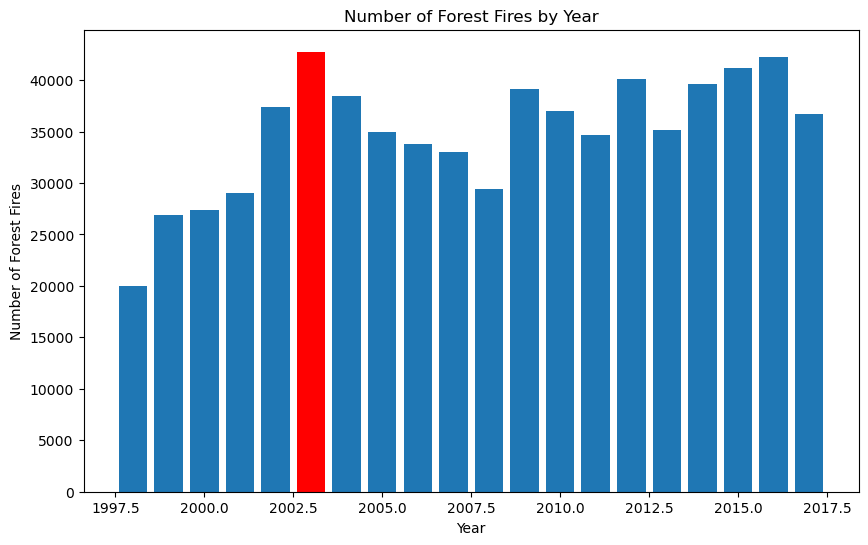

Year with the most reported fire case: 2003


In [27]:
fire_year_df = df[(df['year'] >= 1998) & (df['year'] <= 2017)]

year_sum = fire_year_df.groupby('year')['number'].sum().reset_index()
max_year =year_sum.loc[year_sum['number'].idxmax(), 'year']



plt.figure(figsize=(10, 6))
plt.bar(year_sum['year'], year_sum['number'])


max_index = year_sum['number'].idxmax()
plt.bar(year_sum.loc[max_index, 'year'], year_sum.loc[max_index, 'number'], color='red')


plt.xlabel('Year')
plt.ylabel('Number of Reported Forest Fires')
plt.title('Number of Reported Forest Fires by Year')
plt.show()

print("Year with the most reported fire case:", max_year)


### (12) In which state maximum number of forest fires was reported?

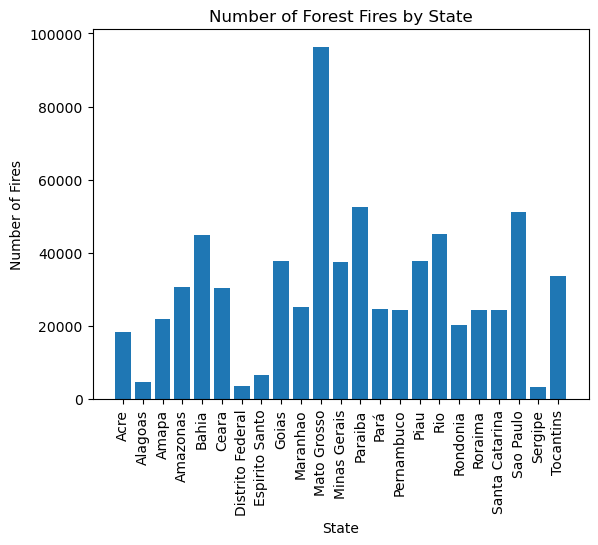

State with the maximum number of forest fires: Mato Grosso
Number of forest fires in Mato Grosso: 96246.028


In [44]:
fires_state = df.groupby('state')['number'].sum().reset_index()

max_state = fires_state.loc[fires_state['number'].idxmax(), 'state']
max_fires = fires_state.loc[fires_state['number'].idxmax(), 'number']

plt.bar(fires_by_state['state'], fires_state['number'])
plt.xlabel('State')
plt.ylabel('Number of Fires')
plt.title('Number of Forest Fires by State')
plt.xticks(rotation=90)
plt.show()

print("State with the maximum number of forest fires:", max_state)
print("Number of forest fires in", max_state + ":", max_fires)

### (13) Find total number of fires were reported in Amazonas.

In [46]:
Amazonas_fires = df[df['state'] == 'Amazonas']['number'].sum()
print("Total number of fires reported in Amazonas:", Amazonas_fires)


Total number of fires reported in Amazonas: 30650.129


### (14) Display number of fires were reported in Amazonas (year-wise).

In [50]:
amazonas_fires = df[df['state'] == 'Amazonas']
fires_year = amazonas_fires.groupby('year')['number'].sum()

print("Number of fires reported in Amazonas (year-wise):")
for year, fires in fires_year.items():
    print("Year:", year, "- Number of Fires:", fires)


Number of fires reported in Amazonas (year-wise):
Year: 1998 - Number of Fires: 946.0
Year: 1999 - Number of Fires: 1061.0
Year: 2000 - Number of Fires: 853.0
Year: 2001 - Number of Fires: 1297.0
Year: 2002 - Number of Fires: 2852.0
Year: 2003 - Number of Fires: 1524.268
Year: 2004 - Number of Fires: 2298.207
Year: 2005 - Number of Fires: 1657.1280000000002
Year: 2006 - Number of Fires: 997.64
Year: 2007 - Number of Fires: 589.601
Year: 2008 - Number of Fires: 2717.0
Year: 2009 - Number of Fires: 1320.601
Year: 2010 - Number of Fires: 2324.508
Year: 2011 - Number of Fires: 1652.538
Year: 2012 - Number of Fires: 1110.641
Year: 2013 - Number of Fires: 905.217
Year: 2014 - Number of Fires: 2385.909
Year: 2015 - Number of Fires: 1189.9940000000001
Year: 2016 - Number of Fires: 2060.9719999999998
Year: 2017 - Number of Fires: 906.905


### (15) Display number of fires were reported in Amazonas (day-wise).

In [51]:
amazonas_fires = df[df['state'] == 'Amazonas']
amazonas_day = amazonas_fires.groupby('date')['number'].sum().reset_index()
print(amazonas_day)

          date    number
0   1998-01-01   946.000
1   1999-01-01  1061.000
2   2000-01-01   853.000
3   2001-01-01  1297.000
4   2002-01-01  2852.000
5   2003-01-01  1524.268
6   2004-01-01  2298.207
7   2005-01-01  1657.128
8   2006-01-01   997.640
9   2007-01-01   589.601
10  2008-01-01  2717.000
11  2009-01-01  1320.601
12  2010-01-01  2324.508
13  2011-01-01  1652.538
14  2012-01-01  1110.641
15  2013-01-01   905.217
16  2014-01-01  2385.909
17  2015-01-01  1189.994
18  2016-01-01  2060.972
19  2017-01-01   906.905


### (16) Find total number of fires were reported in 2015 and visualize data based on each ‘month’.

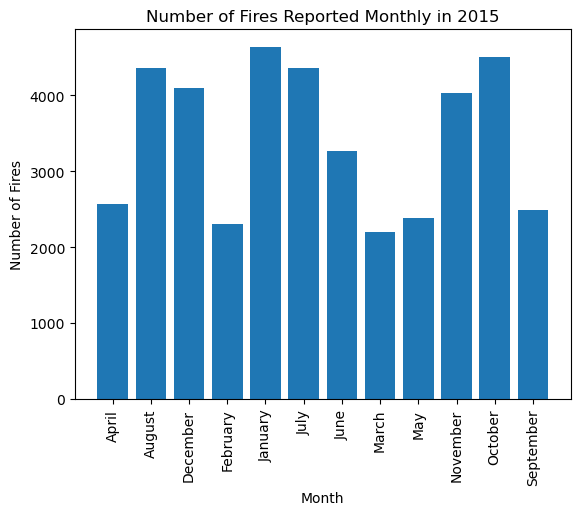

Total number of fires reported in 2015: 41208.292


In [71]:
fire_2015 = df[df['year'] == 2015]

monthly_2015 = fire_2015.groupby('month')['number'].sum().reset_index()

plt.bar(monthly_2015['month'], monthly_2015['number'])
plt.xlabel('Month')
plt.ylabel('Number of Fires')
plt.title('Number of Fires Reported Monthly in 2015')
plt.xticks(rotation=90)
plt.show()

total_2015 = fire_2015['number'].sum()
print("Total number of fires reported in 2015:", total_2015)

### (17) Find average number of fires were reported from highest to lowest (state-wise).

In [75]:
average_state = df.groupby('state')['number'].mean().sort_values(ascending=False)
print(average_state)

average_state = df.groupby('state')['number']

state
Sao Paulo           213.896226
Mato Grosso         201.351523
Bahia               187.222703
Piau                158.174674
Goias               157.721841
Minas Gerais        156.800243
Tocantins           141.037176
Amazonas            128.243218
Ceara               127.314071
Paraiba             109.698573
Maranhao            105.142808
Pará                102.561272
Pernambuco          102.502092
Roraima             102.029598
Santa Catarina      101.924067
Amapa                91.345506
Rondonia             84.876272
Acre                 77.255356
Rio                  62.985865
Espirito Santo       27.389121
Alagoas              19.350000
Distrito Federal     14.899582
Sergipe              13.543933
Name: number, dtype: float64


### (18) Find the state names where fires were reported in 'dec' month.

In [81]:
fire_dec = df[df['month'] == 'December' ]['state'].unique()
print("States where fires were reported in December:")
for state in fire_dec:
    print(state)

States where fires were reported in December:
Acre
Alagoas
Amapa
Amazonas
Bahia
Ceara
Distrito Federal
Espirito Santo
Goias
Maranhao
Mato Grosso
Minas Gerais
Pará
Paraiba
Pernambuco
Piau
Rio
Rondonia
Roraima
Santa Catarina
Sao Paulo
Sergipe
Tocantins
